# problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
# Loading  dataset using pandas
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Description

The dataset contains the information of customers of a Telecom company.
Based on this information we have to predict the customer churn rate.
The dataset is containing the following variables.
1. customerID : Unique ID provided to custommres by Telecom company
2. gender : Gender of the customer
3. SeniorCitizen : whether the customer is senior citizen or not
                    0 : Not a senior citizen
                    1 : senior citizen
4. Partner : whether there is a partner or not
                    0 : No partner
                    1 : Partner
5. Dependents : whether Customer has dependents or not
                    0 : No dependents
                    1 : Dependents
6. tenure : tenure of the plan taken by customer in months
7. PhoneService : if there is phone servive
                    0 : No phone service
                    1 : Phine service
8. MultipleLines
9. InternetService 
10. OnlineSecurity
11. DeviceProtection
12. TechSupport
13. StreamingTV
14. StreamingMovies
15. Contract
16. PaperlessBilling
17. PaymentMethod
18. MonthlyCharges
19. TotalCharges
20
21. Churn

# Data Cleaning & Processing For training dataset

# Check for shape of dataset

In [3]:
# Checking for shape of dataset
print("Number of Rows : ", df.shape[0])
print("Number of Columns : ", df.shape[1])
pd.set_option('display.max_rows',None) 
df.head()

Number of Rows :  7043
Number of Columns :  21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Check for Duplicate entries

In [4]:
df.duplicated().sum()

0

No duplicate entries are present

# Finding Missing Values,'NA',' ','-','?' in training dataset

In [5]:
df.isin([' ','-','?','NA']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 rows in dataset containing white spaces in the column 'TotalCharges'.
We will replace these white spaces by np.NaN

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.NaN)

# Check for NaN's

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that there are 11 null values which we have replaced in above step.

# Let's check for data types

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that the dataset contains both categorical & numerical features.
From the above summary we can see that the type of the feature 'SeniorCitizen' is a int64. We have to convert this into object datatype
Also type of the feature 'TotalCharges' is object. May be it is because of the white spaces present in that feature.
We will alsoSeniorCitizen convert it to float datatype

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
#Let's check datatypes of these two
df['SeniorCitizen'].dtypes,df['TotalCharges'].dtypes


(dtype('O'), dtype('float64'))

In [11]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


From the above summary we can see that for the variable 'TotalCharges' mean is greater than median. Means distribution of 'TotalCharges' is right skewed.


# Missing value Imputation for training data

In [12]:
# here we will impute missing values by mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


# Let's check whether NaN' are filled

In [13]:
df.isnull().sum().sum()

0

Yes... all the NaN's are filled

# Drop the Unnecessary columns

In [14]:
# since customerID is a unique Id provided to each customer it is irrelevent for further analysis 
df.drop('customerID',axis=1,inplace=True)

# Let's seperate the numerical & categorical features

In [15]:
colllist = df.columns
colllist

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
num = []
cat = []

for i in colllist:
    if df.dtypes[i]=='object':
        cat.append(i)
    
    else:
        num.append(i)

In [17]:
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [18]:
num

['tenure', 'MonthlyCharges', 'TotalCharges']

# Visualization

# 1.gender

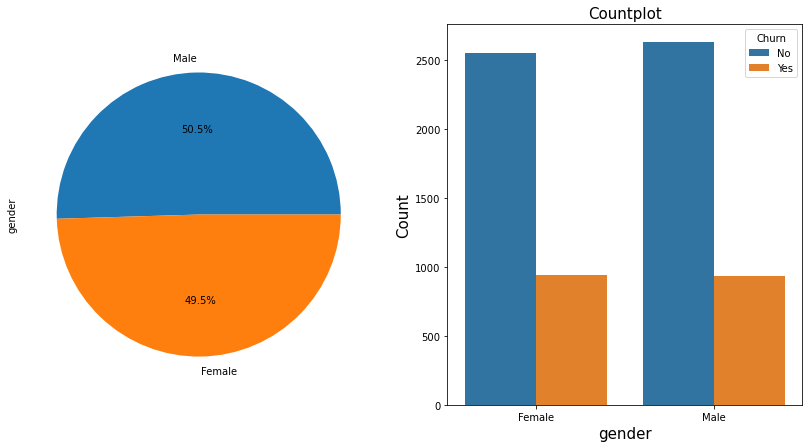

Male      3555
Female    3488
Name: gender, dtype: int64

In [19]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# gender wise distribution of Churn
df['gender'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# gender Countplot
sns.countplot('gender',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('gender', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['gender'].value_counts()

# Observations

There are same count of male & female customers only with 0.5% defference.
Also the Churn rate for female is slightly more than male.

# 2. SeniorCitizen

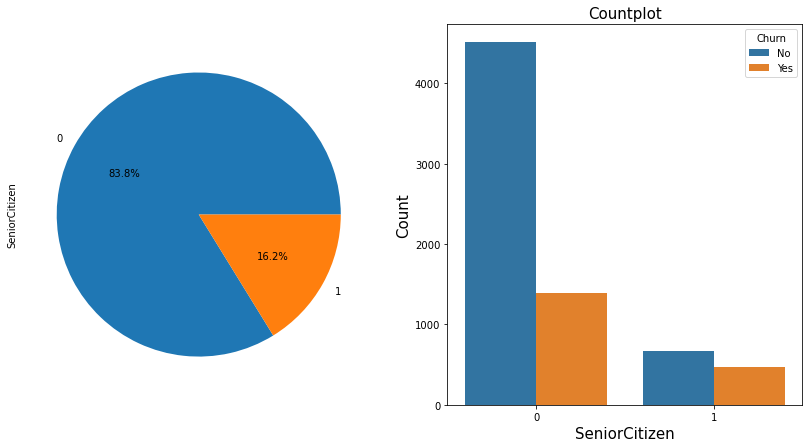

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [20]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# SeniorCitizen wise distribution of Churn
df['SeniorCitizen'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# SeniorCitizen Countplot
sns.countplot('SeniorCitizen',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('SeniorCitizen', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['SeniorCitizen'].value_counts()

# Observations

Only 16.2% customers are senior citizens.
The churn rate is more for the customers who are not senior citizens.

# 3. Partner

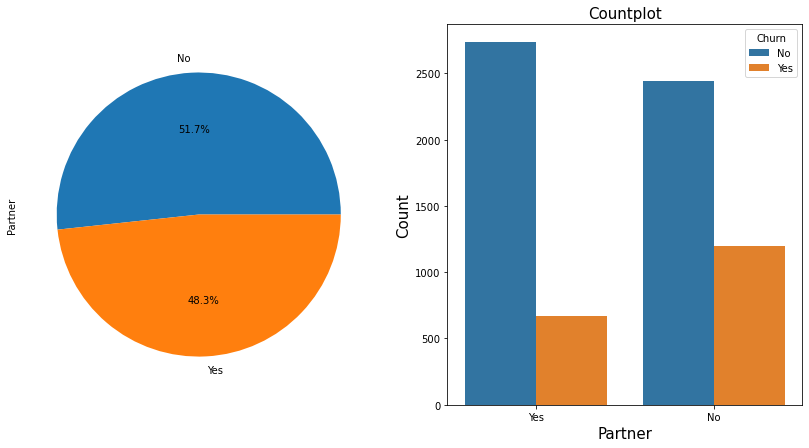

No     3641
Yes    3402
Name: Partner, dtype: int64

In [21]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# Partner wise distribution of Churn
df['Partner'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# Partner Countplot
sns.countplot('Partner',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('Partner', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Partner'].value_counts()

# Observations

51.7% customers are having partners.
Churn rate is more for single customers than customers with partners.

# 4.Dependents

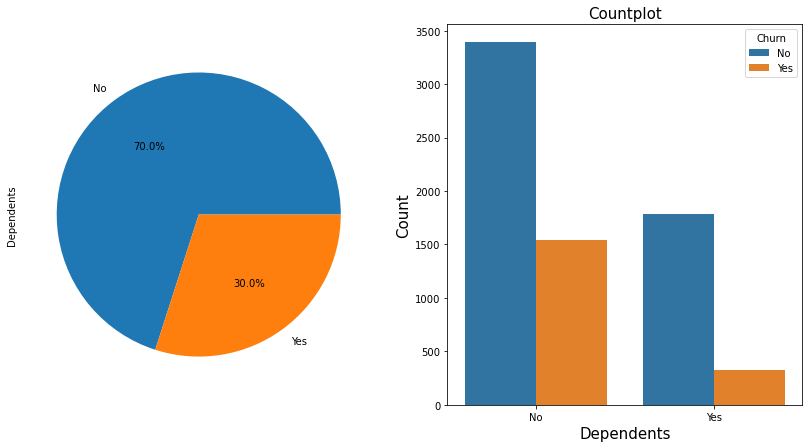

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [22]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# Dependents wise distribution of Churn
df['Dependents'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# Dependents Countplot
sns.countplot('Dependents',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Dependents'].value_counts()

70% of the customers are not having dependents.
The churn rate is more for customers with no dependents.

# 5.PhoneService

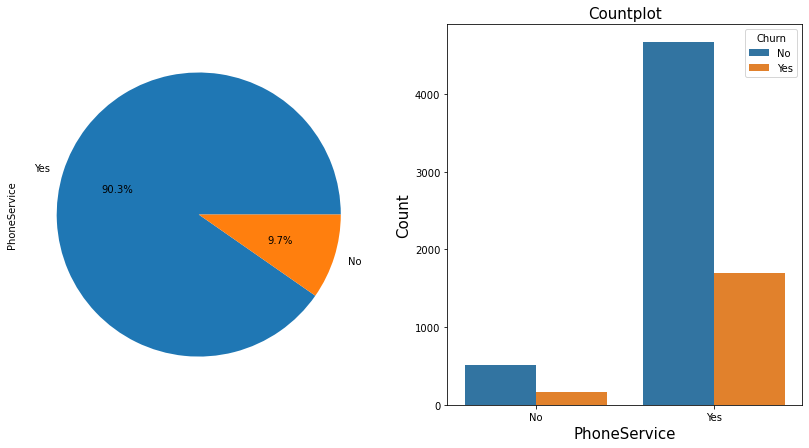

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [23]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# PhoneService wise distribution of Churn
df['PhoneService'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# PhoneService Countplot
sns.countplot('PhoneService',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('PhoneService', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['PhoneService'].value_counts()

# Observations

90.3% customers have PhoneService where remaining 9.7% are not.
The churn rate is more for customers having PhoneService.

# 6.MultipleLines

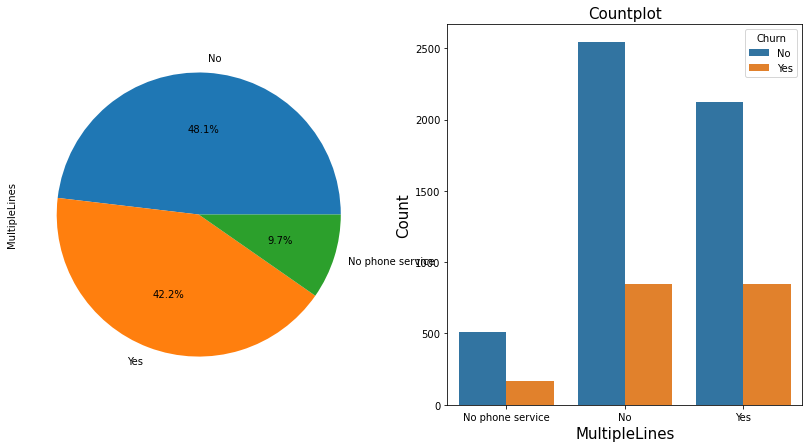

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [24]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# MultipleLines wise distribution of Churn
df['MultipleLines'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# MultipleLines Countplot
sns.countplot('MultipleLines',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('MultipleLines', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['MultipleLines'].value_counts()

# Observations

48.1% customers don't have Multiple lines.
42.2% customers have Multiple lines.
9.7% customers don't have Phone Service.
Attrition rate is same for customers with MultipleLines and with no MultipleLines.

# 7. InternetService

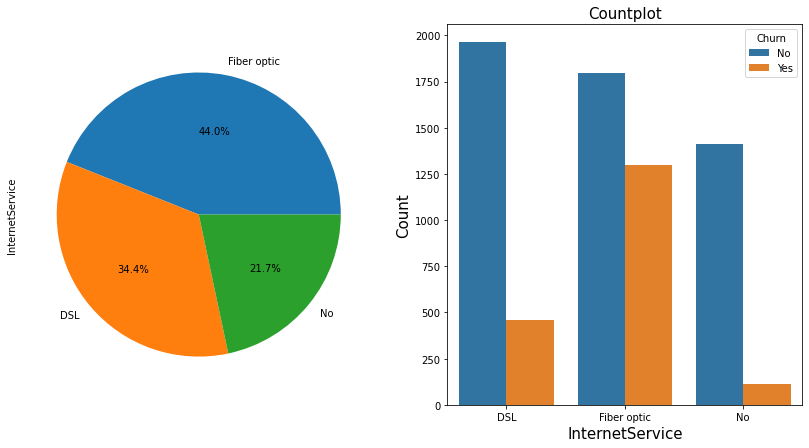

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [25]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# InternetService wise distribution of Churn
df['InternetService'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# InternetService Countplot
sns.countplot('InternetService',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('InternetService', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['InternetService'].value_counts()

# Observations

44% customers have Fibre optic InternetService.
34.4% customers have DSL InternetService.
21.7% customers have No InternetService.
Attrition rate is more for customers having Fibre optic InternetService.

# 8.OnlineSecurity

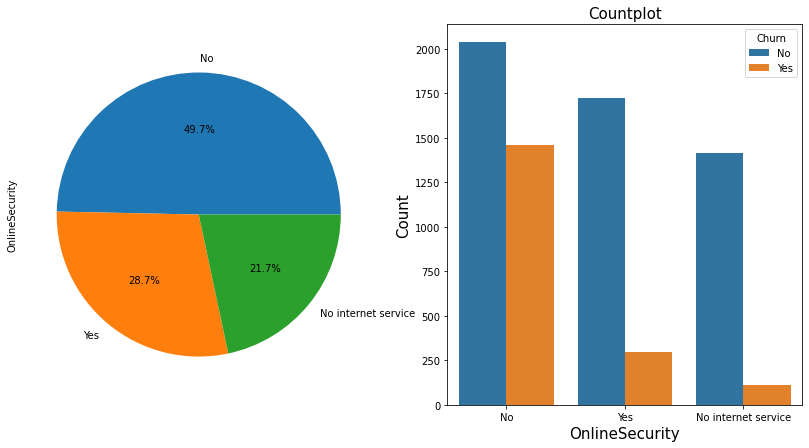

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [26]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# OnlineSecurity wise distribution of Churn
df['OnlineSecurity'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# OnlineSecurity Countplot
sns.countplot('OnlineSecurity',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('OnlineSecurity', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['OnlineSecurity'].value_counts()

# Observations

49.7% customers don't have OnlineSecurity facility.
28.7% customers have OnlineSecurity facility.
21.7% customers don't have Internet service.
The churn rate is more for the customers with no Internet service.

# 9. OnlineBackup

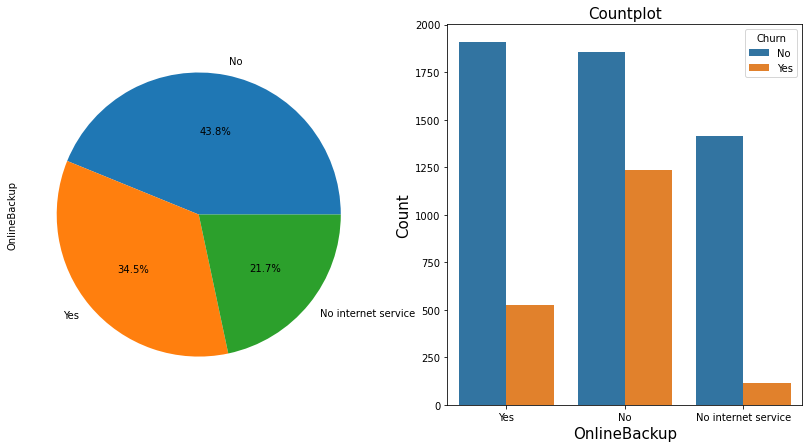

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [27]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# OnlineBackup wise distribution of Churn
df['OnlineBackup'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# OnlineBackup Countplot
sns.countplot('OnlineBackup',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('OnlineBackup', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['OnlineBackup'].value_counts()

# Observations

34.% customers have OnlineBackup service.
43.8% customers don't have OnlineBackup service.
The Attrition rate is more for customers who don't have OnlineBackup service.

# 10. DeviceProtection

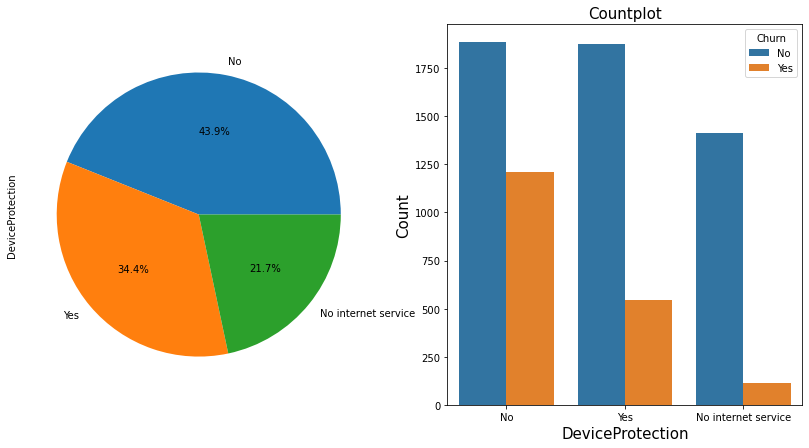

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [28]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# DeviceProtection wise distribution of Churn
df['DeviceProtection'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# DeviceProtection Countplot
sns.countplot('DeviceProtection',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('DeviceProtection', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['DeviceProtection'].value_counts()

# Observations

34.4% customers have DeviceProtection service.
43.9% customers don't have DeviceProtection service.
Attrition rate is same for customers with and without DeviceProtection service.

# 11. TechSupport

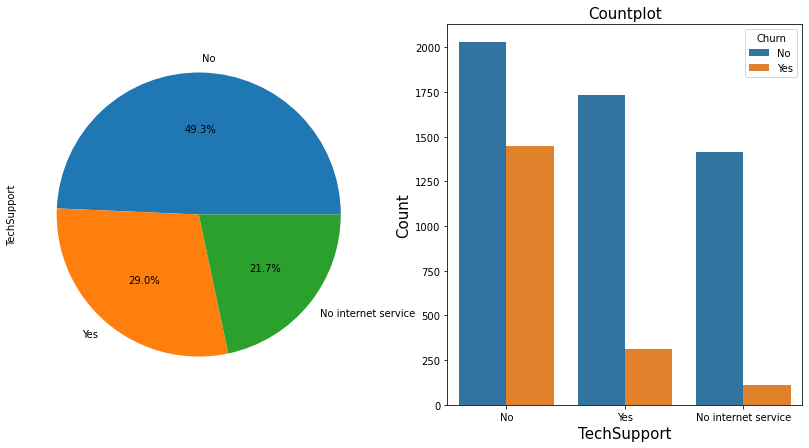

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [29]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# TechSupport wise distribution of Churn
df['TechSupport'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# TechSupport Countplot
sns.countplot('TechSupport',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['TechSupport'].value_counts()

# Observations

49.3% customers don't have TechSupport service.
29% customers have TechSupport service.
Attrition rate is mlre for customers who don't have TechSupport service.

# 12. StreamingTV

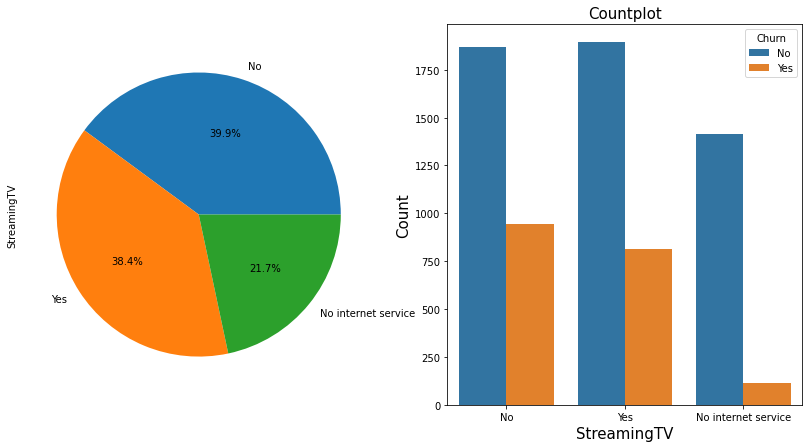

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [30]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# StreamingTV wise distribution of Churn
df['StreamingTV'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# StreamingTV Countplot
sns.countplot('StreamingTV',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['StreamingTV'].value_counts()

# Observations

Near about 40% customers are not StreamingTV
38.4% customers are StreamingTV
Attrition rate is slight more for customers who are not StreamingTV.

# 13. StreamingMovies

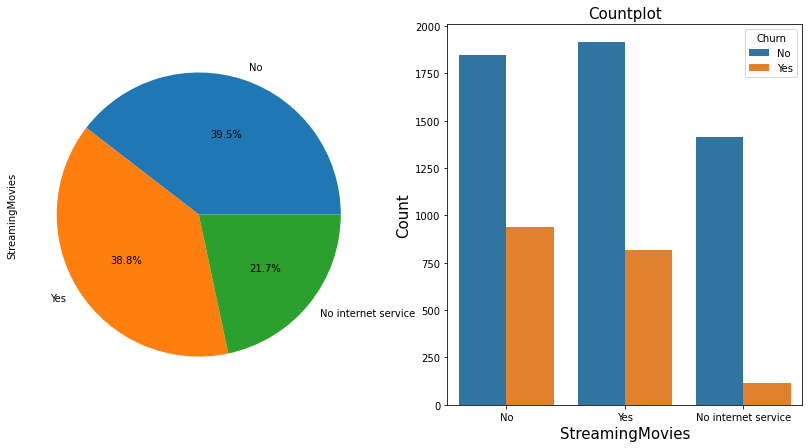

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [31]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# StreamingMovies wise distribution of Churn
df['StreamingMovies'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# StreamingMovies Countplot
sns.countplot('StreamingMovies',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['StreamingMovies'].value_counts()

# Observations

38.8% customers are StreamingMovies
39.5% customers are not StreamingMovies
Attrition rate is slight more for customers who are not StreamingMovies.

# 14. Contract

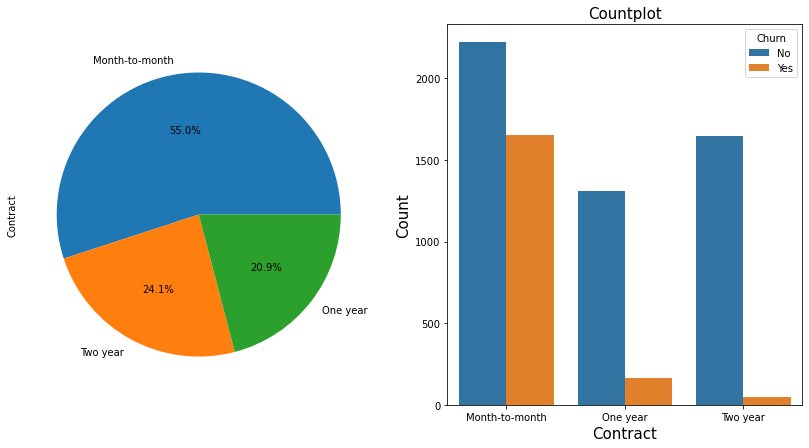

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [32]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# Contract wise distribution of Churn
df['Contract'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# Contract Countplot
sns.countplot('Contract',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Contract'].value_counts()

# Observations

55% customers have Month-to-month Contract
24.1% customers have Two year Contract
20.9% customers have One year Contract
Attrition rate is high for customers with Mon.th-to-month

# 15. PaperlessBilling

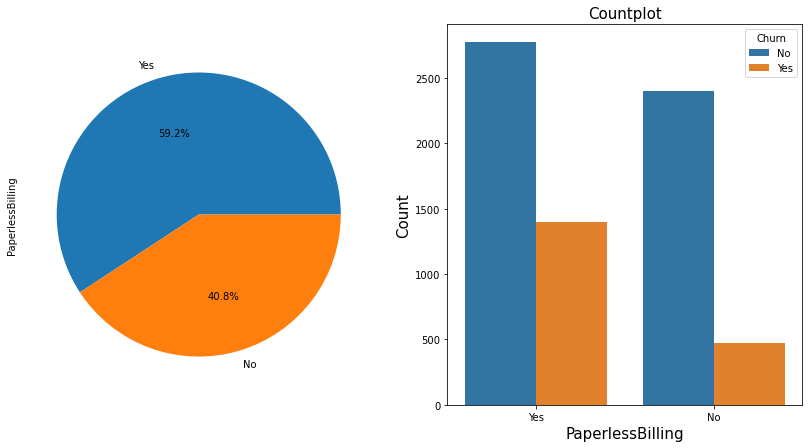

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [33]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# PaperlessBilling wise distribution of Churn
df['PaperlessBilling'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# PaperlessBilling Countplot
sns.countplot('PaperlessBilling',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['PaperlessBilling'].value_counts()

# Observations

59.2% customers like PaperlessBilling
40.8% customers don't like PaperlessBilling
Attrition rate is more for customers who likes PaperlessBilling

# 16. PaymentMethod

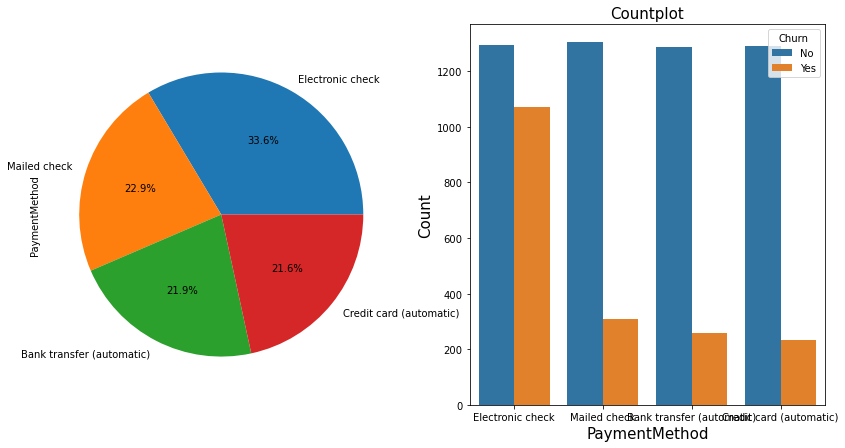

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [34]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# PaymentMethod wise distribution of Churn
df['PaymentMethod'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# PaymentMethod Countplot
sns.countplot('PaymentMethod',hue = 'Churn',data = df,ax=ax[1])
plt.xlabel('PaymentMethod', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['PaymentMethod'].value_counts()

# Observations 

22.9% customers make payment through Mailed check
21.9% customers make payment through Bank transf
21.6% customers make payment through Credit card
33.6% customers make payment through Electronic check
Attrition rate is more for Electronic check PaymentMethod.

# 17. tenure

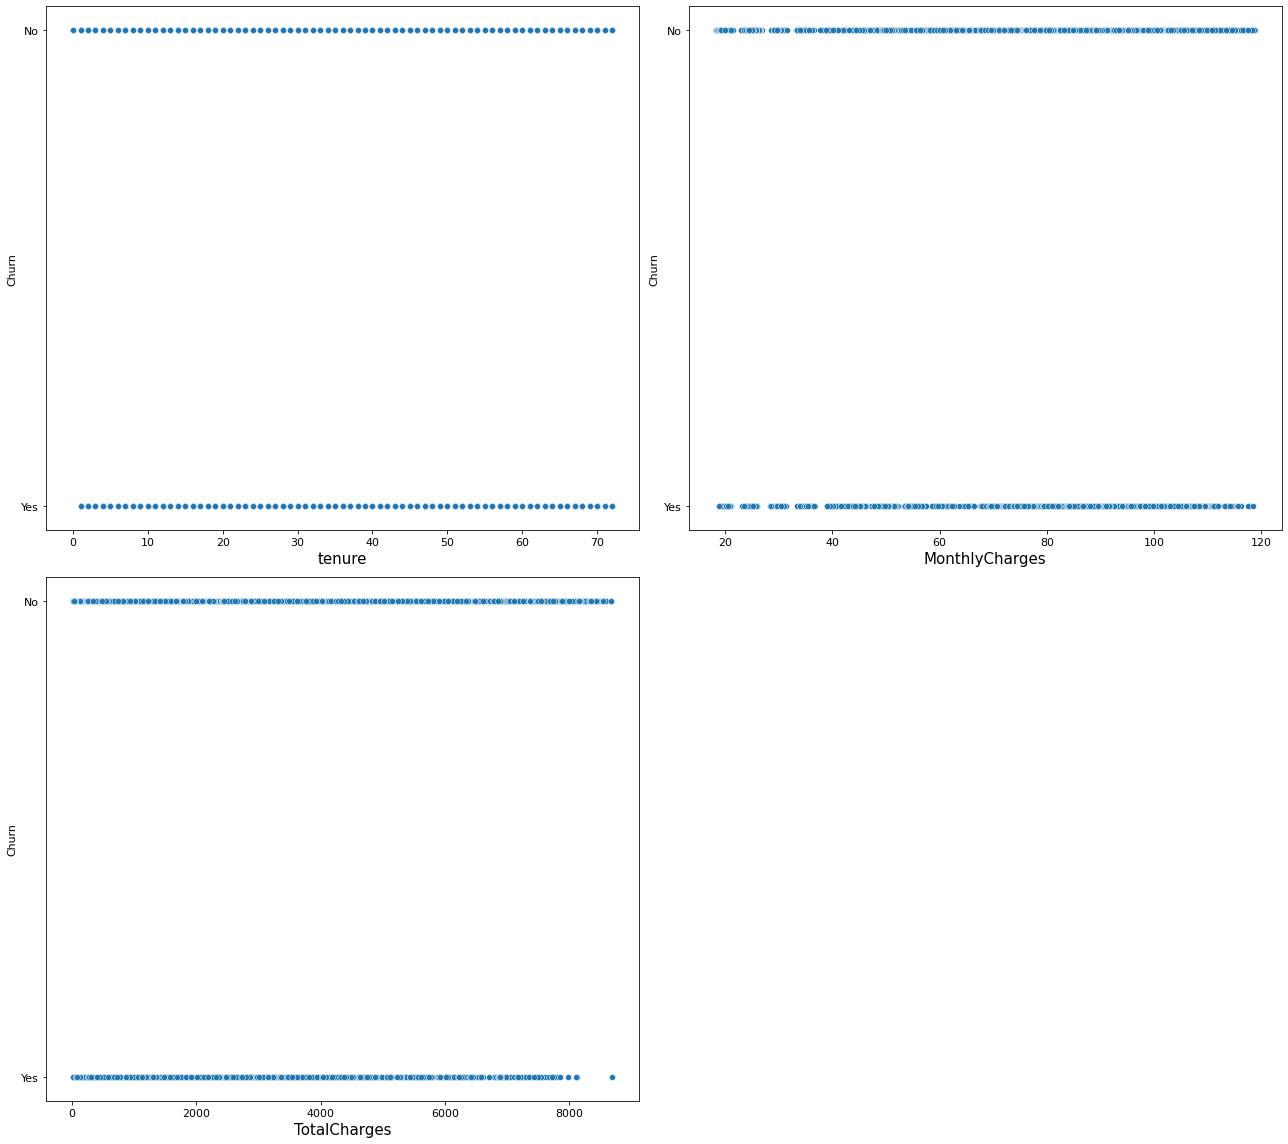

In [35]:
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in num:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot( x= df[i],y = df['Churn'])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Churn', fontsize =11)
        plt.xticks(fontsize = 11)
        plt.yticks(fontsize = 11)
    plotnumber+=1
plt.tight_layout()


# 18. Target feature

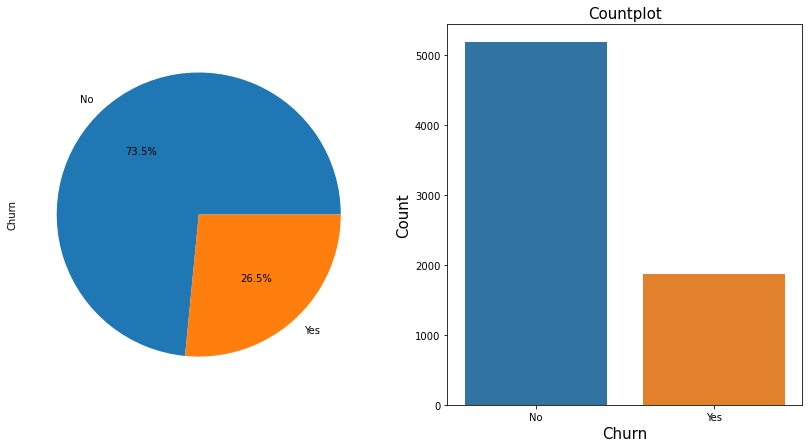

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
f,ax=plt.subplots(1,2,figsize=(14,7))
# Churn distribution
df['Churn'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# Churn Countplot
sns.countplot('Churn',data = df,ax=ax[1])
plt.xlabel('Churn', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Churn'].value_counts()

# Observations

26.5% customers are likely to churn
73.5% customers not likely to churn
This countplot shows that our target variable is imbalanced. So we have balance it.

# Outliers Detection

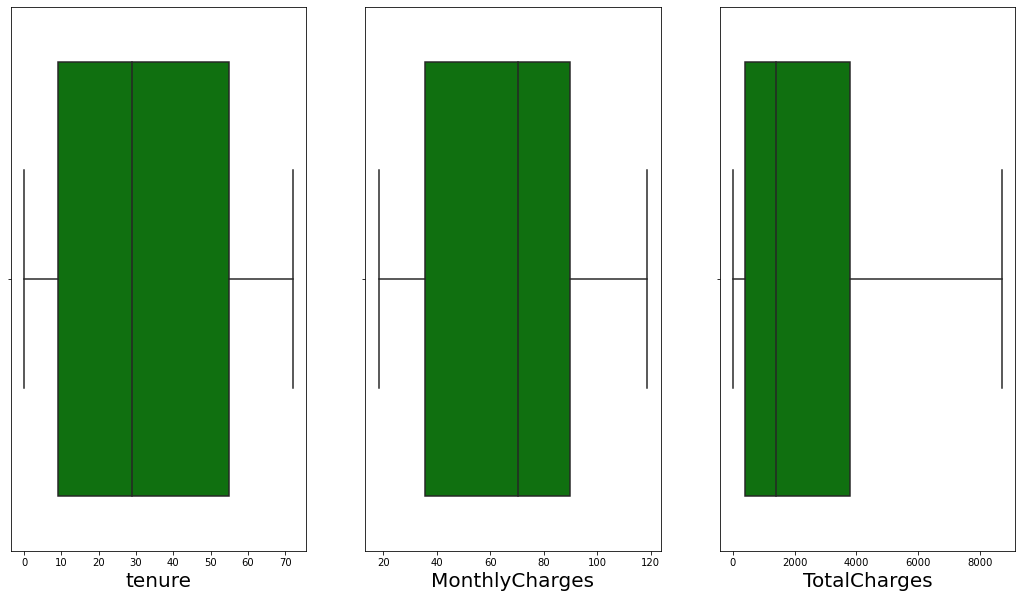

In [37]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for c in num:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df[c],color='g')
        plt.xlabel(c,fontsize=20)
    plotnumber+=1
plt.show()


From the above boxplots we can see that no outliers are present in these features.

# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Correlation

In [39]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


# Correlation Heatmap

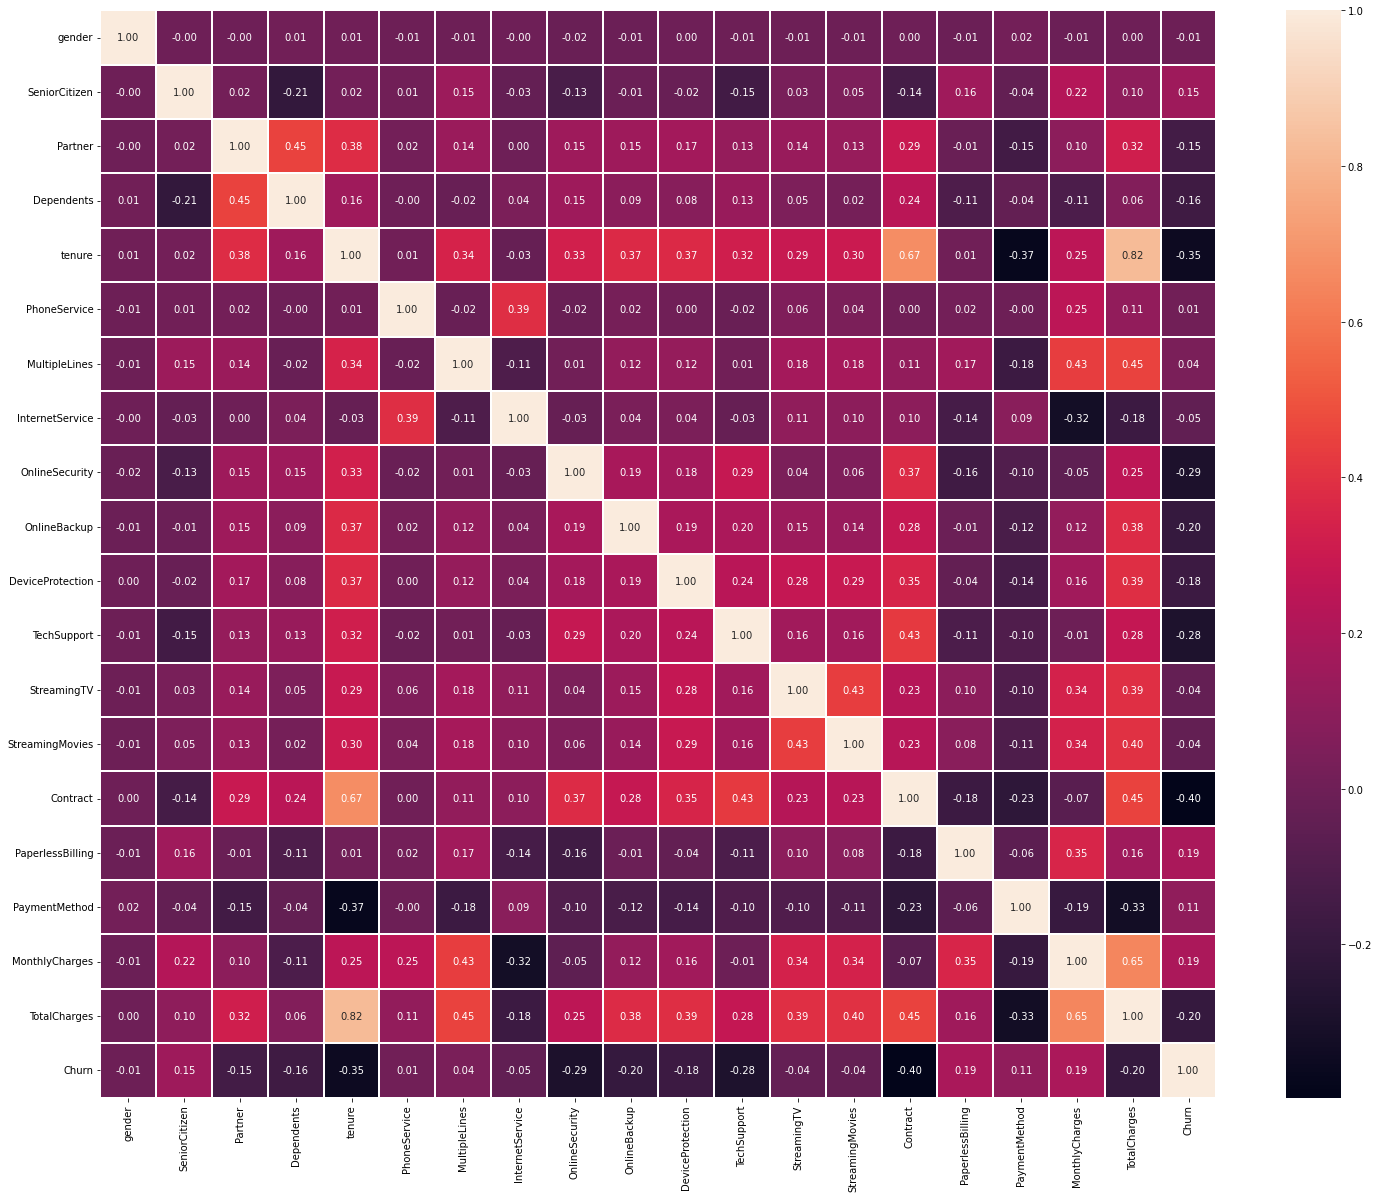

In [40]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot = True,linewidth=0.2,fmt='0.2f')
plt.show()

In [41]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

# Skewness

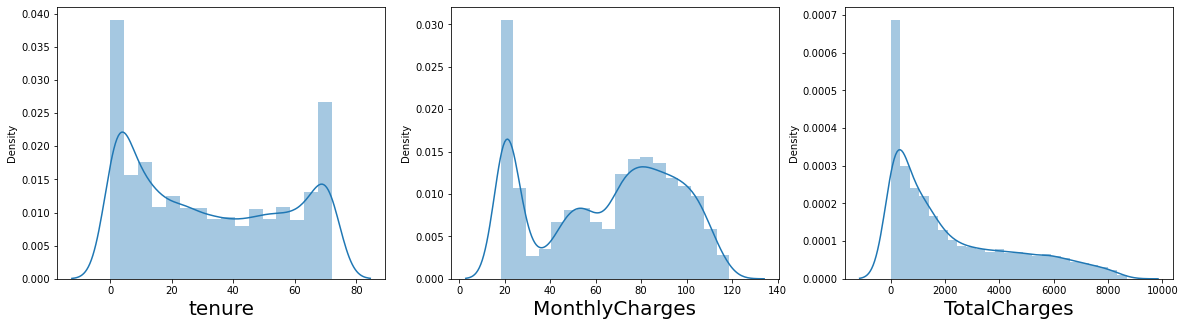

In [42]:
plt.figure(figsize=(20,5),facecolor='white')

plotnum=1
for c in num:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=20)
    plotnum+=1
plt.show()

In [43]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

There is no relevence of skewness for discrete numerical variables like tenure and categorical features.
So we are not removing skewness from these variables.
We will remove the skewness only from 'TotalCharges'.


In [44]:
# let's make log transformation for this variable.
df['TotalCharges'] = np.log1p(df['TotalCharges'])

# Divide Dataset into Target & Features

In [45]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [45]:
Y

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
30      0
31      0
32      0
33      0
34      0
35      0
36      1
37      0
38      1
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      1
48      0
49      0
50      0
51      1
52      0
53      1
54      0
55      1
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      1
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      1
81      0
82      1
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      1
96      0
97      1
98      0
99      1


# Balancing Target Variable

In [46]:
from imblearn.over_sampling import SMOTE
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [47]:
Y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

We have successfully balanced our target variable

# Standard Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Let's Check for Multicollinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.013827,gender
1,1.096073,SeniorCitizen
2,1.544646,Partner
3,1.438786,Dependents
4,6.414940,tenure
5,1.744018,PhoneService
6,1.409623,MultipleLines
7,1.745561,InternetService
8,1.343906,OnlineSecurity
9,1.226936,OnlineBackup


The VIF values for all independent features are within permissible limit of 10.

# PCA

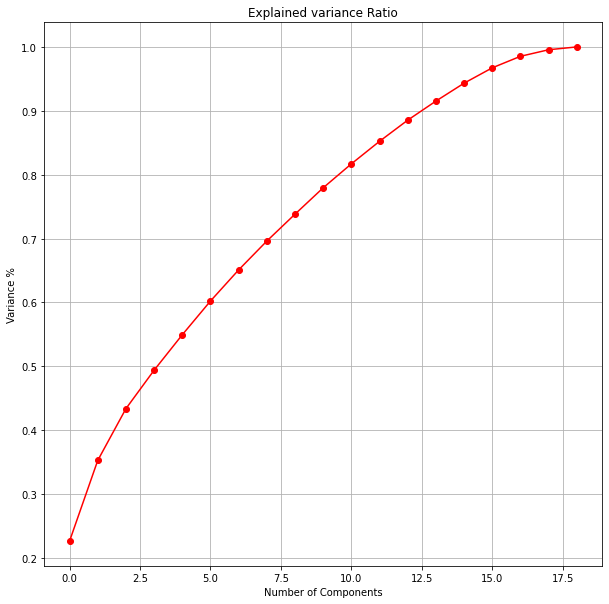

In [50]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

S per the graph, we can see that 13 principal components attribute for 90% of variation in the data. We shall pick the first 13 components for our prediction. 

In [51]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [52]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

# Model Building

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Splitting dataset into training and test data

In [54]:
x_train,x_test,y_train,y_test = train_test_split(principle_x,Y,random_state=99,test_size=0.3)

In [55]:
x_train.shape,x_test.shape

((7243, 13), (3105, 13))

# Finding Best random state

In [57]:
maxaccu=0
maxRS=0

for i in range(9,999):
    x_train, x_test, y_train, y_test = train_test_split(principle_x, Y, random_state=i, test_size=0.3)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred_lr=lr.predict(x_test)
    acc = accuracy_score(y_test,y_pred_lr)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print('Best Accuracy Score is', maxaccu ,'on Random_state', maxRS)

Best Accuracy Score is 0.8009661835748793 on Random_state 229


We got best random state 135. We will use this in further model building

# 1. Logistic Regression 

In [58]:
x_train, x_test, y_train, y_test = train_test_split(principle_x, Y, random_state=229, test_size=0.3)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [59]:
accuracy_score_lr = accuracy_score(y_test,y_pred_lr)

In [60]:
print("accuracy_score_lr : ",accuracy_score(y_test,y_pred_lr))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_lr))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_lr))

accuracy_score_lr :  0.8009661835748793


confusion_matrix

 :  [[1205  347]
 [ 271 1282]]


classification_report

 :                precision    recall  f1-score   support

           0       0.82      0.78      0.80      1552
           1       0.79      0.83      0.81      1553

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



# Cross validation Score

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
CV_Score_lr = cross_val_score(lr,principle_x, Y,cv=5).mean()
CV_Score_lr

0.774647978089254

# 2. RandomForestClassifier

In [66]:
x_train, x_test, y_train, y_test = train_test_split(principle_x, Y, random_state=229, test_size=0.3)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [67]:
accuracy_score_rf = accuracy_score(y_test,y_pred_rf)

In [68]:
print("accuracy_score_rf : ",accuracy_score(y_test,y_pred_rf))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_rf))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_rf))

accuracy_score_rf :  0.8122383252818035


confusion_matrix

 :  [[1293  259]
 [ 324 1229]]


classification_report

 :                precision    recall  f1-score   support

           0       0.80      0.83      0.82      1552
           1       0.83      0.79      0.81      1553

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



# Cross validation Score

In [69]:
CV_Score_rf = cross_val_score(rf,principle_x, Y,cv=5).mean()
CV_Score_rf

0.8020003128772331

# 3. DecisionTreeClassifier

In [70]:
x_train, x_test, y_train, y_test = train_test_split(principle_x, Y, random_state=229, test_size=0.3)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [71]:
accuracy_score_dt = accuracy_score(y_test,y_pred_dt)

In [72]:
print("accuracy_score_dt : ",accuracy_score(y_test,y_pred_dt))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_dt))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_dt))

accuracy_score_dt :  0.7587761674718196


confusion_matrix

 :  [[1173  379]
 [ 370 1183]]


classification_report

 :                precision    recall  f1-score   support

           0       0.76      0.76      0.76      1552
           1       0.76      0.76      0.76      1553

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



# Cross validation Score

In [73]:
CV_Score_dt = cross_val_score(dt,principle_x, Y,cv=5).mean()
CV_Score_dt

0.7523245143981899

# 4. KNeighborsClassifier

In [77]:
x_train, x_test, y_train, y_test = train_test_split(principle_x, Y, random_state=229, test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [78]:
accuracy_score_knn = accuracy_score(y_test,y_pred_knn)

In [79]:
print("accuracy_score_knn : ",accuracy_score(y_test,y_pred_knn))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_knn))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_knn))

accuracy_score_knn :  0.7861513687600644


confusion_matrix

 :  [[1153  399]
 [ 265 1288]]


classification_report

 :                precision    recall  f1-score   support

           0       0.81      0.74      0.78      1552
           1       0.76      0.83      0.80      1553

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# Cross validation Score

In [80]:
CV_Score_knn = cross_val_score(knn,principle_x, Y,cv=5).mean()
CV_Score_knn

0.7771614096286801

# 5. ExtraTreesClassifier

In [81]:
x_train, x_test, y_train, y_test = train_test_split(principle_x, Y, random_state=229, test_size=0.3)
xt = ExtraTreesClassifier()
xt.fit(x_train,y_train)
y_pred_xt = xt.predict(x_test)

In [82]:
accuracy_score_xt = accuracy_score(y_test,y_pred_xt)

In [83]:
print("accuracy_score_xt : ",accuracy_score(y_test,y_pred_xt))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_xt))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_xt))

accuracy_score_xt :  0.8109500805152979


confusion_matrix

 :  [[1285  267]
 [ 320 1233]]


classification_report

 :                precision    recall  f1-score   support

           0       0.80      0.83      0.81      1552
           1       0.82      0.79      0.81      1553

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



# Cross validation Score

In [84]:
CV_Score_xt = cross_val_score(xt,principle_x, Y,cv=5).mean()
CV_Score_xt

0.7993913837345866

# Result

In [86]:
result = pd.DataFrame({'Model Name':['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','ExtraTreesClassifier'],
                       'Accuracy_Score' : [accuracy_score_lr,accuracy_score_rf,accuracy_score_dt,accuracy_score_knn,accuracy_score_xt],
                       'Cross Validation SCore' : [CV_Score_lr,CV_Score_rf,CV_Score_dt,CV_Score_knn,CV_Score_xt]})
result

,Model Name,Accuracy_Score,Cross Validation SCore
0,LogisticRegression,0.800966,0.774648
1,RandomForestClassifier,0.812238,0.802000
2,DecisionTreeClassifier,0.758776,0.752325
3,KNeighborsClassifier,0.786151,0.777161
4,ExtraTreesClassifier,0.810950,0.799391


From the above result we can see that the model RandomForestRegressor gives us best accuracy score with minimum difference between model accuracy and Cross validation score.
Hence we will select this one as final model


# Hyper Parameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
n_estimators = [1,3,5]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [12,6]
min_samples_split = [3,5]
min_samples_leaf = [2,7]
bootstrap = ['true','false']

In [89]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [90]:
clf1 = GridSearchCV(rf,param_grid,cv = 10,verbose = True,n_jobs = -1)

In [91]:
best_clf1 = clf1.fit(X,Y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [92]:
best_clf1.best_estimator_

RandomForestClassifier(bootstrap='true', max_depth=12, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3, n_estimators=5)

In [93]:
param_accuracy_rf = round(best_clf1.score(X,Y),3)
param_accuracy_rf

0.893

# Model Saving

In [94]:
import pickle
import joblib


In [95]:
joblib.dump(rf,"CustomerChurn.pkl")

['CustomerChurn.pkl']

# Loading the saved model

In [96]:
model = joblib.load("CustomerChurn.pkl")

# Prediction on test data

In [98]:
prediction = model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 0, 1])

In [99]:
predict_test = pd.DataFrame()
predict_test['Churn']=prediction
predict_test.head(10)

,Churn
0,1
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,1
9,1
